# Batch-vs-stochastic-vs-Mini_Batch GD

1. time----------------------------------SGD > MBGD > BGD
2. conversion---------------------------SGD < MBGD < BGD
3. SGD graph L vs epochs----------more spikes,jaggedness,                 unstable behaviour
0. MBGD graph L vs epochs--------less spikes,jaggedness, than the SGD    unstable behaviour 
0. BGD graph L vs epochs----------smooth curve                            stable behaviour

# Stochastics GD------ batch_size=1

In [58]:
import numpy as np
import pandas as pd
import time

In [59]:
df = pd.read_csv('Social_Network_Ads.csv')

In [60]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [61]:
df = df[['Age','EstimatedSalary','Purchased']]

In [62]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [63]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [64]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [66]:
X_scaled.shape

(400, 2)

In [67]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [68]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=25,batch_size=1,validation_split=0.2)
print('total time to predict:- ',time.time() - start)

Epoch 1/25
320/320 [==============================] - 2s 5ms/step - loss: 0.6189 - accuracy: 0.7375 - val_loss: 0.6571 - val_accuracy: 0.6375
Epoch 2/25
320/320 [==============================] - 1s 3ms/step - loss: 0.4836 - accuracy: 0.7906 - val_loss: 0.5847 - val_accuracy: 0.7000
Epoch 3/25
320/320 [==============================] - 1s 3ms/step - loss: 0.3888 - accuracy: 0.8094 - val_loss: 0.4954 - val_accuracy: 0.7250
Epoch 4/25
320/320 [==============================] - 1s 3ms/step - loss: 0.3415 - accuracy: 0.8375 - val_loss: 0.4392 - val_accuracy: 0.7625
Epoch 5/25
320/320 [==============================] - 1s 3ms/step - loss: 0.3140 - accuracy: 0.8469 - val_loss: 0.3874 - val_accuracy: 0.8125
Epoch 6/25
320/320 [==============================] - 1s 3ms/step - loss: 0.3017 - accuracy: 0.8531 - val_loss: 0.3551 - val_accuracy: 0.8375
Epoch 7/25
320/320 [==============================] - 1s 3ms/step - loss: 0.2920 - accuracy: 0.8594 - val_loss: 0.3212 - val_accuracy: 0.8875
Epoch 

Text(0.5, 1.0, 'Accuracy Comparision')

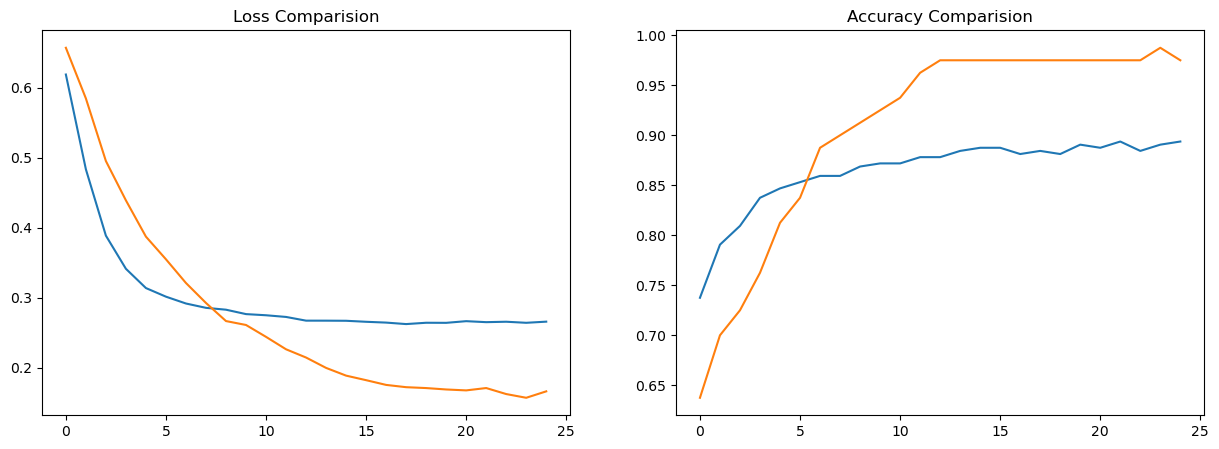

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Comparision')

# Batch GD ------ batch_size=n

In [72]:
df1 = pd.read_csv('Social_Network_Ads.csv')

In [73]:
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [74]:
df1 = df1[['Age','EstimatedSalary','Purchased']]

In [75]:
df1.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [76]:
X = df1.iloc[:,0:2]
y = df1.iloc[:,-1]

In [77]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [79]:
X_scaled.shape

(400, 2)

In [80]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [81]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=25,batch_size=320,validation_split=0.2)
print('total time to predict:- ',time.time() - start)

Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 0.7273 - accuracy: 0.5781 - val_loss: 0.8979 - val_accuracy: 0.3625
Epoch 2/25
1/1 [==============================] - 0s 103ms/step - loss: 0.7204 - accuracy: 0.7125 - val_loss: 0.8940 - val_accuracy: 0.3625
Epoch 3/25
1/1 [==============================] - 0s 60ms/step - loss: 0.7154 - accuracy: 0.7125 - val_loss: 0.8911 - val_accuracy: 0.3625
Epoch 4/25
1/1 [==============================] - 0s 73ms/step - loss: 0.7110 - accuracy: 0.7125 - val_loss: 0.8888 - val_accuracy: 0.3625
Epoch 5/25
1/1 [==============================] - 0s 98ms/step - loss: 0.7071 - accuracy: 0.7125 - val_loss: 0.8871 - val_accuracy: 0.3625
Epoch 6/25
1/1 [==============================] - 0s 81ms/step - loss: 0.7035 - accuracy: 0.7125 - val_loss: 0.8856 - val_accuracy: 0.3625
Epoch 7/25
1/1 [==============================] - 0s 86ms/step - loss: 0.7000 - accuracy: 0.7125 - val_loss: 0.8844 - val_accuracy: 0.3625
Epoch 8/25
1/1 [============

Text(0.5, 1.0, 'Accuracy Comparision')

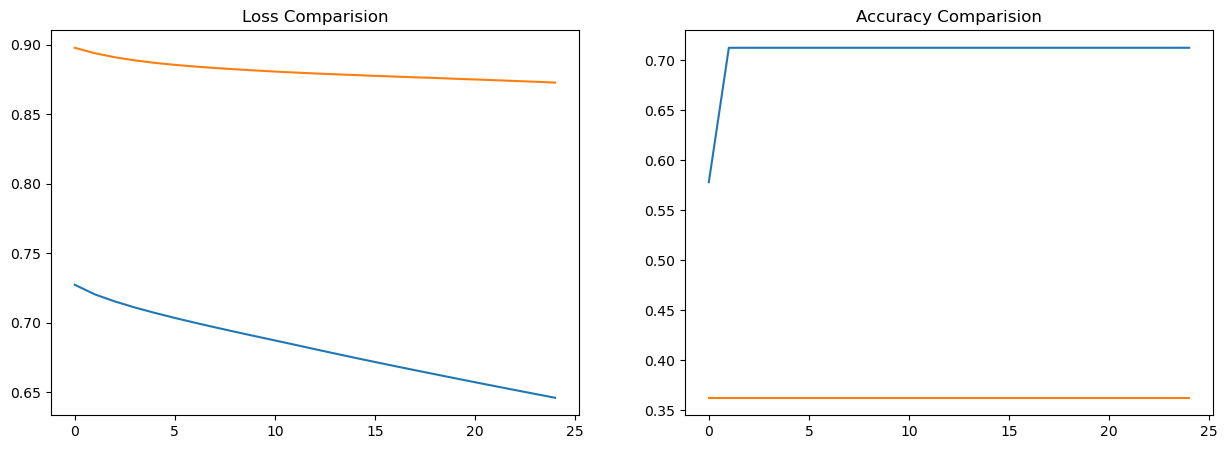

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Comparision')

# Mini-batch GD ------ batch_size= not 1 and not n,instead of that

In [83]:
df2 = pd.read_csv('Social_Network_Ads.csv')

In [84]:
df2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [85]:
df2 = df2[['Age','EstimatedSalary','Purchased']]

In [86]:
df2.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [87]:
X = df2.iloc[:,0:2]
y = df2.iloc[:,-1]

In [88]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [90]:
X_scaled.shape

(400, 2)

In [91]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [92]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=25,batch_size=32,validation_split=0.2)
print('total time to predict:- ',time.time() - start)

Epoch 1/25
10/10 [==============================] - 1s 39ms/step - loss: 0.6549 - accuracy: 0.7750 - val_loss: 0.6705 - val_accuracy: 0.7500
Epoch 2/25
10/10 [==============================] - 0s 10ms/step - loss: 0.6181 - accuracy: 0.7969 - val_loss: 0.6643 - val_accuracy: 0.7125
Epoch 3/25
10/10 [==============================] - 0s 10ms/step - loss: 0.5895 - accuracy: 0.7937 - val_loss: 0.6588 - val_accuracy: 0.7000
Epoch 4/25
10/10 [==============================] - 0s 12ms/step - loss: 0.5638 - accuracy: 0.8125 - val_loss: 0.6533 - val_accuracy: 0.6875
Epoch 5/25
10/10 [==============================] - 0s 11ms/step - loss: 0.5402 - accuracy: 0.8125 - val_loss: 0.6481 - val_accuracy: 0.7000
Epoch 6/25
10/10 [==============================] - 0s 10ms/step - loss: 0.5183 - accuracy: 0.8188 - val_loss: 0.6436 - val_accuracy: 0.7000
Epoch 7/25
10/10 [==============================] - 0s 10ms/step - loss: 0.4976 - accuracy: 0.8219 - val_loss: 0.6388 - val_accuracy: 0.7000
Epoch 8/25
10

Text(0.5, 1.0, 'Accuracy Comparision')

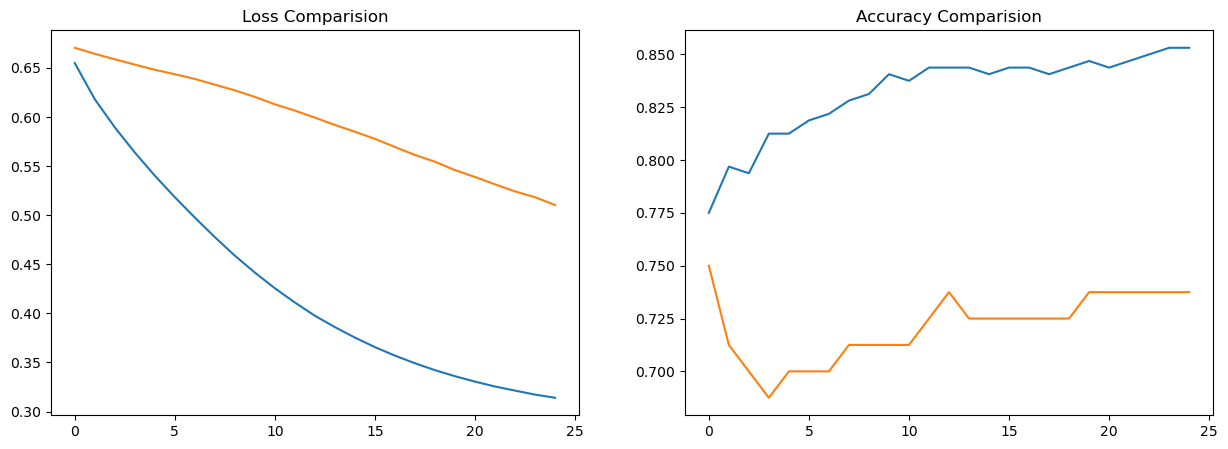

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Comparision')